Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Preprocesamiento de Datos

In [2]:
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print("time_serires: ", time_series)
train_size = int(len(time_series) * 0.6)
train_data = time_series[:train_size]
test_data = time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)

time_serires:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data:  [10 11 12 13 14 15]


Preparación de Datos para LSTM

In [3]:
def create_dataset(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 4
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

print("Conjunto de secuencias de entrenamiento:\n", X_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba:\n", X_test)
print("Etiquetas de prueba:\n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]


Construcción y compilación del modelo

In [4]:
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenamiento del modelo

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 57.5670
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 56.5810
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 55.6094
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 54.6523
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 53.7099
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 52.7794
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 51.8571
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 50.9487
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 50.0422
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 49.1488
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 48.2695
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 47.4043
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 46.5522
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 45.7132
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 44.8884
Epoch 

<Axes: >

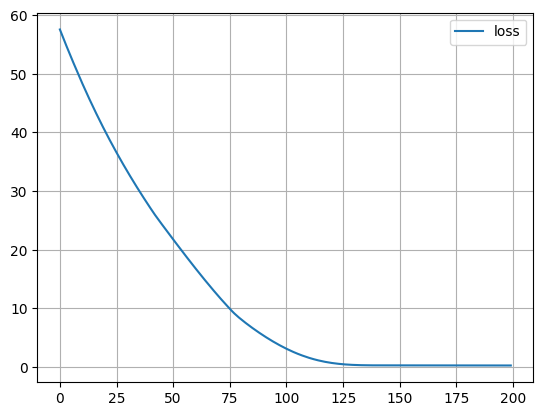

In [5]:
history = model.fit(X_train, y_train, epochs=200)
pd.DataFrame(history.history).plot(grid=True)

Evaluación del modelo

In [6]:
evaluacion = model.evaluate(X_test, y_test)
print("Evaluación: ", evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 5.7153
Evaluación:  5.715277671813965


Predicción

In [7]:
print("X_test: \n", X_test)
print("y_test: \n", y_test)
y_pred = model.predict(X_test)
print("Predicción: \n", y_pred)

X_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicción: 
 [[16.214808]
 [17.554447]]
